In [1]:
# Let's import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np
import re

# Load the pyplot collection of functions from matplotlib, as plt 
from matplotlib import pyplot as plt

In [2]:
# loadin the data.

# First,we will make a variable called url_LondonHousePrices, and assign it the following link, enclosed in quotation-marks as a string:
# https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls

url_LondonHousePrices = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index.xls"

# The dataset we're interested in contains the Average prices of the houses, and is actually on a particular sheet of the Excel file. 
# As a result, we need to specify the sheet name in the read_excel() method.
# Put this data into a variable called properties.  
properties = pd.read_excel(url_LondonHousePrices, sheet_name='Average price', index_col= None)

In [4]:
 # Cleaning, transforming, and visualizing
 # let's explore the data
print(properties.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            338 non-null    datetime64[ns]
 1   City of London        339 non-null    object        
 2   Barking & Dagenham    339 non-null    object        
 3   Barnet                339 non-null    object        
 4   Bexley                339 non-null    object        
 5   Brent                 339 non-null    object        
 6   Bromley               339 non-null    object        
 7   Camden                339 non-null    object        
 8   Croydon               339 non-null    object        
 9   Ealing                339 non-null    object        
 10  Enfield               339 non-null    object        
 11  Greenwich             339 non-null    object        
 12  Hackney               339 non-null    object        
 13  Hammersmith & Fulham

In [5]:
print(properties.shape)

(339, 49)


In [6]:
properties.head()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
0,NaT,E09000001,E09000002,E09000003,E09000004,E09000005,E09000006,E09000007,E09000008,E09000009,...,E12000002,E12000003,E12000004,E12000005,E12000006,E12000007,E12000008,E12000009,NaN,E92000001
1,1995-01-01,91448.98487,50460.2266,93284.51832,64958.09036,71306.56698,81671.47692,120932.8881,69158.16225,79885.89069,...,43958.48001,44803.42878,45544.52227,48527.52339,56701.5961,74435.76052,64018.87894,54705.1579,NaN,53202.77128
2,1995-02-01,82202.77314,51085.77983,93190.16963,64787.92069,72022.26197,81657.55944,119508.8622,68951.09542,80897.06551,...,43925.42289,44528.80721,46051.57066,49341.29029,56593.59475,72777.93709,63715.02399,54356.14843,NaN,53096.1549
3,1995-03-01,79120.70256,51268.96956,92247.52435,64367.49344,72015.76274,81449.31143,120282.2131,68712.44341,81379.86288,...,44434.8681,45200.46775,45383.82395,49442.17973,56171.18278,73896.84204,64113.60858,53583.07667,NaN,53201.2843
4,1995-04-01,77101.20804,53133.50526,90762.87492,64277.66881,72965.63094,81124.41227,120097.899,68610.04641,82188.90498,...,44267.7796,45614.34341,46124.23045,49455.93299,56567.89582,74455.28754,64623.22395,54786.01938,NaN,53590.8548


In [7]:
properties.tail()

,Unnamed: 0,City of London,Barking & Dagenham,Barnet,Bexley,Brent,Bromley,Camden,Croydon,Ealing,...,NORTH WEST,YORKS & THE HUMBER,EAST MIDLANDS,WEST MIDLANDS,EAST OF ENGLAND,LONDON,SOUTH EAST,SOUTH WEST,Unnamed: 47,England
334,2022-10-01,902309.282,353520.9551,605114.2948,406868.9186,577222.7821,515517.5002,845839.7887,433201.6497,538847.9643,...,218171.2016,211638.0918,251002.179,254341.3325,358796.2772,537313.5016,400111.3921,334155.9043,NaN,312138.7957
335,2022-11-01,958869.7855,356902.8691,596539.3541,405329.0206,572466.8925,515314.0875,834225.2381,431935.2326,537449.6779,...,219767.7831,212548.8769,253124.0033,253781.1612,361824.0641,538777.4212,399345.0026,335215.8753,NaN,313161.9285
336,2022-12-01,929060.0982,356645.1966,596637.6706,406858.5581,564118.4765,515509.8178,837359.2735,431143.1771,540902.4493,...,218317.4552,212196.9342,254628.1777,256001.5963,360864.8677,537118.8715,401841.6064,330245.3044,NaN,312728.0529
337,2023-01-01,978120.5133,352043.1242,598835.4533,399887.1166,560637.6337,514158.9388,828319.5188,430576.8897,539559.7662,...,215343.324,207306.0227,252569.964,254864.7371,358063.813,538115.7467,400235.2256,330488.4091,NaN,310885.8095
338,2023-02-01,960867.8271,344518.0012,602510.1509,399578.3604,548074.5348,508088.1603,848186.7627,425363.6031,546213.9155,...,214145.927,207219.9554,249750.6034,253920.9316,357697.4896,532212.4352,395571.4151,326615.6064,NaN,308365.2199


In [8]:
# Cleaning the data
properties_transpose = properties.transpose()

properties_transpose = properties_transpose.reset_index()

properties_transpose.columns = properties_transpose.iloc[0]
properties_transpose = properties_transpose.drop(0)

properties_transpose.head()

,Unnamed: 0,NaT,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [9]:
# continuing to clean the data

properties_columns = properties_transpose.rename(columns={
    properties_transpose.columns[0]: 'London_Borough',
    properties_transpose.columns[1]: 'ID'
})
properties_columns.head()

,London_Borough,ID,1995-01-01 00:00:00,1995-02-01 00:00:00,1995-03-01 00:00:00,1995-04-01 00:00:00,1995-05-01 00:00:00,1995-06-01 00:00:00,1995-07-01 00:00:00,1995-08-01 00:00:00,...,2022-05-01 00:00:00,2022-06-01 00:00:00,2022-07-01 00:00:00,2022-08-01 00:00:00,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00
1,City of London,E09000001,91448.98487,82202.77314,79120.70256,77101.20804,84409.14932,94900.51244,110128.0423,112329.4376,...,795174.941,817653.89,823465.9092,867266.9155,863879.8209,902309.282,958869.7855,929060.0982,978120.5133,960867.8271
2,Barking & Dagenham,E09000002,50460.2266,51085.77983,51268.96956,53133.50526,53042.24852,53700.34831,52113.12157,52232.19868,...,334860.1394,344686.2927,348768.9455,350456.7649,349749.4368,353520.9551,356902.8691,356645.1966,352043.1242,344518.0012
3,Barnet,E09000003,93284.51832,93190.16963,92247.52435,90762.87492,90258.00033,90107.23471,91441.24768,92361.31512,...,584042.5146,589629.3011,590956.5544,601802.5584,607196.4449,605114.2948,596539.3541,596637.6706,598835.4533,602510.1509
4,Bexley,E09000004,64958.09036,64787.92069,64367.49344,64277.66881,63997.13588,64252.32335,63722.70055,64432.60005,...,385259.9068,388894.2716,394492.2897,400778.7012,402890.116,406868.9186,405329.0206,406858.5581,399887.1166,399578.3604
5,Brent,E09000005,71306.56698,72022.26197,72015.76274,72965.63094,73704.04743,74310.48167,74127.03788,73547.0411,...,529771.7571,532821.5739,549660.5579,560279.3404,580872.8243,577222.7821,572466.8925,564118.4765,560637.6337,548074.5348


In [10]:
# Transforming the data
properties_melt = pd.melt(properties_columns, id_vars= ['London_Borough', 'ID'])

properties_melt = properties_melt.rename(columns={
    properties_melt.columns[2]: 'Month',
    properties_melt.columns[3]: 'Avg_Price'
})
properties_melt.head()

,London_Borough,ID,Month,Avg_Price
0,City of London,E09000001,1995-01-01,91448.98487
1,Barking & Dagenham,E09000002,1995-01-01,50460.2266
2,Barnet,E09000003,1995-01-01,93284.51832
3,Bexley,E09000004,1995-01-01,64958.09036
4,Brent,E09000005,1995-01-01,71306.56698


In [11]:
print(properties_melt.dtypes)

properties_melt['Avg_Price'] = properties_melt.loc[:,['Avg_Price']].astype(float)

properties_melt.dtypes

London_Borough            object
ID                        object
Month             datetime64[ns]
Avg_Price                 object
dtype: object


London_Borough            object
ID                        object
Month             datetime64[ns]
Avg_Price                float64
dtype: object

In [12]:
# Cleaning data part 3
unique = properties_melt['London_Borough'].unique()
print(unique)
print(unique.size)

properties_dropna = properties_melt.dropna()

unique = properties_dropna['London_Borough'].unique()
print(unique)
print(unique.size)

borough_names = unique[1:33]
print(borough_names)
print(borough_names.size)

borough_names = pd.DataFrame(borough_names)

boroughs = pd.merge(properties_dropna,pd.DataFrame(borough_names),left_on='London_Borough',right_on=0,how='inner')
unique = boroughs['London_Borough'].unique()
print(unique)
print(unique.size)

['City of London' 'Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley'
 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames'
 'Southwark' 'Sutton' 'Tower Hamlets' 'Waltham Forest' 'Wandsworth'
 'Westminster' 'Unnamed: 34' 'Inner London' 'Outer London' 'Unnamed: 37'
 'NORTH EAST' 'NORTH WEST' 'YORKS & THE HUMBER' 'EAST MIDLANDS'
 'WEST MIDLANDS' 'EAST OF ENGLAND' 'LONDON' 'SOUTH EAST' 'SOUTH WEST'
 'Unnamed: 47' 'England']
48
['City of London' 'Barking & Dagenham' 'Barnet' 'Bexley' 'Brent' 'Bromley'
 'Camden' 'Croydon' 'Ealing' 'Enfield' 'Greenwich' 'Hackney'
 'Hammersmith & Fulham' 'Haringey' 'Harrow' 'Havering' 'Hillingdon'
 'Hounslow' 'Islington' 'Kensington & Chelsea' 'Kingston upon Thames'
 'Lambeth' 'Lewisham' 'Merton' 'Newham' 'Redbridge' 'Richmond upon Thames

<Axes: xlabel='Month'>

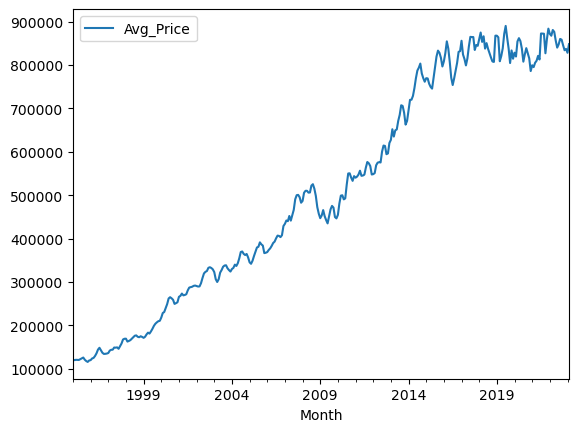

In [13]:
# Visualizing the data
camden = boroughs[boroughs['London_Borough']=='Camden']
month_v_price = camden[['Month','Avg_Price']].set_index('Month')

month_v_price.plot.line()

In [4]:

def create_price_ratio(borough_subset):
    price1998 = float(borough_subset['Average_Price'][borough_subset['Year']==1998])
    price2018 = float(borough_subset['Average_Price'][borough_subset['Year']==2018])
    ratio = [price1998/price2018]
    return ratio

price_ratios = {}

for borough in prop_TRG['London_Borough'].unique():
    subset = prop_TRG[prop_TRG['London_Borough'] == borough]
    price_ratios[borough] = create_price_ratio(subset)[0]
    

ratio_df_sorted = pd.DataFrame({'Borough': price_ratios.keys(), '2018': price_ratios.values()})\
    .sort_values(by='2018', ascending=False)
print(ratio_df_sorted.head(5))
print(ratio_df_sorted.tail(5))

ratio_graph = ratio_df_sorted.head(15).plot(kind='bar', x='Borough', y='2018', rot=80, ylabel='1998 to 2018 Price Ratio')

top15_df = prop_TRG[prop_TRG['London_Borough'].isin(ratio_df_sorted.head(15)['Borough'])]

top15_df[top15_df['Year'].isin([1998, 2018])].plot(kind='bar', x='London_Borough', y='Average_Price', color=['blue', 'orange'], legend=False)

prop_TRG[prop_TRG['Year'].isin([1998, 2018]) & prop_TRG['London_Borough'].isin(['Hounslow', 'Hackney'])]

NameError: name 'prop_TRG' is not defined